In [1]:
import json
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from collections import Counter
import re
import matplotlib.pyplot as plt
import numpy as np
import difflib
import spacy
import spacy.cli
import nltk
# spacy.cli.download("en_core_web_sm")
from nltk.corpus import stopwords
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
with open('C:/Hammad Aslam/BS IT (post ADP)/3rd Semester/Capstone Project/Project/backend/datasets/categories/allFiles/appliances.json', 'r') as f:
    data = json.load(f)
data[0]
# print(len(data[0]['reviews']))

{'product_title': ['Generic FP10355 BL Portable Washing Machine Blue'],
 'all_products_href': ['https://www.amazon.com/Mayjooy-Portable-Washing-Function-Apartment/dp/B09NPWF7KW/ref=sr_1_9586?qid=1706520020&s=hi&sr=1-9586'],
 'product_rating_points': ['1'],
 'product_ratings': ['1 rating'],
 'product_price': ['$179.99 '],
 'product_images_src': ['https://m.media-amazon.com/images/I/61A5fjss0sL._AC_SX679_.jpg'],
 'product_description': [' Twin Tub Design Equipped with two tubs our practical washing machine can operate the washer or spinner separately or run both sides at the same time providing you with a lot of convenience for daily use The two in one design saves space and money 3 Control Knobs Our washing machine has 3 knobs on the control panel and you can customize the wash timer wash selection and spin timer to choose the right time and wash mode including gentle normal or drain depending on the material of your clothes 26lbs Large Capacity Timer Function Designed with an 18 pound 

In [11]:
# for index in range(len(data)):
def get_topics(index):
    positive_topics = []
    negative_topics = []
    for i in range(len(data[index]['reviews'])):
        if data[index]["reviews"][i]['sentiment'] == 'Positive':
            for j in range(len(data[index]["reviews"][i]['review_topics'])):
                positive_topics.append(data[index]["reviews"][i]['review_topics'][j])
        if data[index]["reviews"][i]['sentiment'] == 'Negative':
            for j in range(len(data[index]["reviews"][i]['review_topics'])):
                negative_topics.append(data[index]["reviews"][i]['review_topics'][j])
    return positive_topics, negative_topics, data[index]['product_title'][0]


positive_topics, negative_topics, title = get_topics(5)
positive_topics = [topic for topic in positive_topics if topic != 'none']
negative_topics = [topic for topic in negative_topics if topic != 'none']
len(positive_topics), len(negative_topics), title

(13, 7, 'SPT THERMOELECTRIC WINE COOLER 20 BOTTLES')

In [12]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().lower())  # Convert to lowercase for consistency
    return synonyms

# syn = list(get_synonyms(topics[9]))
# syn

In [13]:
def are_phrases_similar(phrase1, phrase2):
    # Tokenize and normalize phrases
    # tokens1 = set(word_tokenize(phrase1.lower()))
    # tokens2 = set(word_tokenize(phrase2.lower()))
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    new_record1 = re.sub(" +", " ",phrase1)
    new_record2 = re.sub(" +", " ",phrase2)
    doc1 = nlp(new_record1)
    doc2 = nlp(new_record2)
    for token in doc1:
        filtered_list = [token for token in doc1 if not token.is_stop]
        tokens1 = set([f"{token.lemma_}" for token in filtered_list])
        
    for token in doc2:
        filtered_list = [token for token in doc2 if not token.is_stop]
        tokens2 = set([f"{token.lemma_}" for token in filtered_list])
        
    # print(tokens1, tokens2)
    # Check if both phrases have similar tokens
    if tokens1 == tokens2:
        return True
    
    # Check for synonyms
    for token in tokens1:
        synonyms = get_synonyms(token)
        if tokens2.intersection(synonyms):
            return True
    
    return False

In [14]:
def are_similar(a, b, threshold=0.6):
    """
    Check if two strings are similar based on token similarity.
    """
    seq = difflib.SequenceMatcher(None, a, b)
    ratio = seq.ratio()
    # print(seq.ratio(), a, b)
    return ratio > threshold

In [15]:
def count_phrase_frequency_in_array(unique_array, original_array):
    frequency_counter = Counter()
    for i, phrase1 in enumerate(unique_array):
        count = 1
        for j, phrase2 in enumerate(original_array):
            if i != j:  # Avoid comparing a phrase with itself
                if are_phrases_similar(phrase1.lower(), phrase2.lower()):
                    count += 1
        frequency_counter[phrase1] = count
        # for phrase in original_array:
        #     if are_phrases_similar(phrase.lower(), phrase1.lower()):
        #         frequency_counter[phrase1] = count
    return frequency_counter


def get_unique(phrase_array):
    unique_pair = []
    count = 0
    for i in range(len(phrase_array)):
        for j in range(i+1, len(phrase_array)):
            if not are_phrases_similar(phrase_array[i], phrase_array[j]):
                # print(phrase_array[i], phrase_array[j])
                unique_pair.append(phrase_array[j])
            count += 1
            print(count)
    return unique_pair

In [16]:
unique_positive = get_unique(positive_topics)
unique_negative = get_unique(negative_topics)
frequency_positive = count_phrase_frequency_in_array(list(set(unique_positive)), positive_topics)
frequency_negative = count_phrase_frequency_in_array(list(set(unique_negative)), negative_topics)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [17]:
# topics = []
for index in range(len(data)):
    data[index]['topic_frequency'] = []
    if index == 0:
        # for i in range(len(data[index]['reviews'])):
        # print(f"{(list(set(unique)))}\n{(dict(frequency))}")
        
        
        freq_pos = dict(frequency_positive)
        freq_neg = dict(frequency_negative)
        new_pos = len(set(unique_positive))
        new_neg = len(set(unique_negative))
        temp_pos = []
        temp_neg = []
        for key, value in freq_pos.items():
            temp_pos.append({'topic': key, 'freq': (int((value/new_pos)*100))})
        for key, value in freq_neg.items():
            temp_neg.append({'topic': key, 'freq': (int((value/new_pos)*100))})
        sorted_freq_pos = sorted(temp_pos, key=lambda x: x['freq'], reverse=True)
        sorted_freq_neg = sorted(temp_neg, key=lambda x: x['freq'], reverse=True)
        print(sorted_freq_pos)
        print(sorted_freq_neg)
        x_pos = []
        x_neg = []
        y_pos = []
        y_neg = []
        for k in sorted_freq_pos[0: 20]:
            x_pos.append(k['topic'])
            y_pos.append(k['freq'])
        for k in sorted_freq_neg[0: 20]:
            x_neg.append(k['topic'])
            y_neg.append(k['freq'])
            # print(k['freq'])
# unique

[{'topic': 'wine bottle', 'freq': 45}, {'topic': 'poor cooling wine', 'freq': 36}, {'topic': 'wine cellar', 'freq': 36}, {'topic': '8-bottle cooler', 'freq': 36}, {'topic': 'light flashing', 'freq': 27}, {'topic': 'beep', 'freq': 27}, {'topic': 'beeping', 'freq': 27}, {'topic': 'lights flashing', 'freq': 27}, {'topic': 'refrigerator', 'freq': 27}, {'topic': 'fan running', 'freq': 18}, {'topic': 'dimensions', 'freq': 18}]
[{'topic': 'storage for red wines', 'freq': 27}, {'topic': 'temperature', 'freq': 27}, {'topic': 'leaking water', 'freq': 18}, {'topic': 'waste of money', 'freq': 18}, {'topic': 'wine chiller', 'freq': 18}, {'topic': 'space', 'freq': 18}]


11


C:\Users\GS\AppData\Local\Temp\ipykernel_332\350120183.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


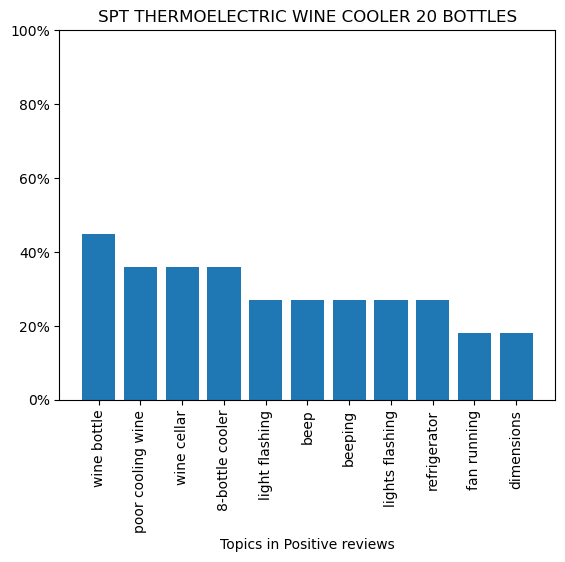

In [23]:
print(len(y_pos))
fig, ax = plt.subplots()
bars = ax.bar(x_pos, y_pos)
scaled_y = [val / max(y_pos) * 100 for val in y_pos]
# plt.bar(x, scaled_y)
ax.set_ylim(0, 100)
# ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation='vertical')
plt.xlabel('Topics in Positive reviews')
plt.ylabel('frequency')
# plt.yticks(y, ['{}%'.format(i) for i in y])
# plt.grid()
plt.title(title)
plt.show()


6


C:\Users\GS\AppData\Local\Temp\ipykernel_332\1249796017.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


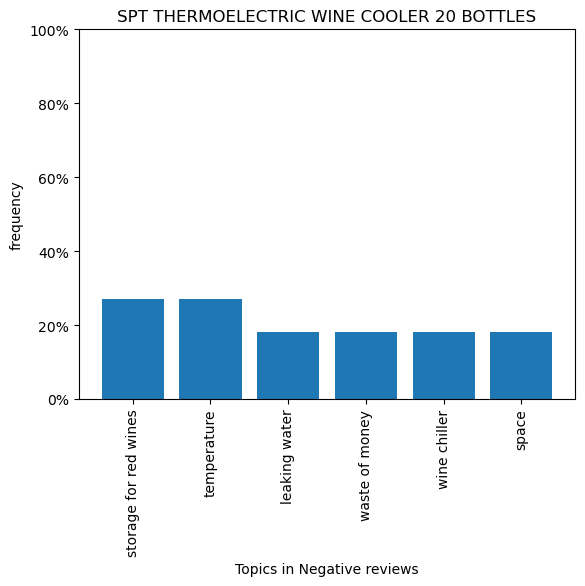

In [24]:
print(len(y_neg))
fig, ax = plt.subplots()
bars = ax.bar(x_neg, y_neg)
scaled_y = [val / max(y_neg) * 100 for val in y_neg]
# plt.bar(x, scaled_y)
ax.set_ylim(0, 100)
# ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation='vertical')

plt.xlabel('Topics in Negative reviews')
plt.ylabel('frequency')
# plt.yticks(y, ['{}%'.format(i) for i in y])
# plt.grid()
plt.title(title)
plt.show()
